# M-P Neuron: input vector, weight vector, activation function, threshold, dot product
1. 먼저 Biological neuron의 구조와 작동 방식을 이해-integrate and fire
2. Neuron 의 작동방식에 영감을 받아 탄생한 M-P neuron 의 작동방식을 이해- 매우 간단하다. 실제 뉴런의 몇가지 특징을 abstraction 을 거쳐서 수리모형화 했다
3. M-P 뉴런은 linear operation 즉 덧셈과 곱셈을 기반으로 한다. 입력을 전부 더해서 출력에 반영하는데 이때 입력이 출력 뉴런에 대해 미치는 영향을 weight 이라고 한다. 입력 * 웨잇을 전부 더하면 출력이 된다. 
4. 마지막으로 M-P 뉴런이 행하는 일은 뉴런의 활동 방식을 흉내내어 fire 할 지 말지를 결정하는 것이다. 이를 결정하는 것도 수학적으로 정의해서 결정함수(activation function)라고 부른다. 여러가지 결정함수를 생각해볼 수 있는데 일단 M-P 뉴런의 기본 결정함수는 threshold 보다 크면 1 아니명 0을 출력하는 계단형태의 함수 (step function)이다. 
5. M-P 뉴런의 입력은 세상에서 일어나는 일들에 대한 비유가 될 수 있다. 우선세상을 binary한 차원으로 축소시켜 보자. 예를 들어 내가 점심을 먹을지 말지를 결정하는 뉴런이라고 하자. 고려해야 할 요소들이 무수히 많은데 그 요소들도 전부 binary 형태를 가진다. 맛있다 없다, 비싸다 싸다.등등.  
6. 이제 내가 입력을 받아서 결정하는 방식을 하나 예를 들자. 입맛이 매우 까다로와서 맛과 가격 모두가 좋아야(1) 한다. 둘 중 하나만 나빠도 (0) 먹지 않는다. 이건 logical operation으로는 AND 에 해당한다. 만약에 맛이나 가격 둘 중 하나만 맞아도 된다고 하면 그건 logical OR 에 해당한다.
7. 자 한번 적당한 weight 를 집어넣어서 AND 나 OR 형태의 의사결정을 흉내내어 보자. 입력과 웨이트를 곱한 합이 threshold 보다 낮으면 0이 되므로 threshold를 0.5로 할 경우 웨이트가 0.4가 되면 올바른 출력이 나오게 될 것이다. 즉 직관적으로 계산해서 threshold 보다 살짝 낮은 값이면 된다. 만약 너무 작으면 예를 들어 0.1이면 전부 0이 되므로 틀린 답이 나올 것이다. 
8. 만약 matrix operation 을 모른다면 for loop를 입력의 수만큼 돌리면 되겠지만 matrix operation 을 따른다면 더 간단하게 할 수 있다. 

In [2]:
import numpy as np

def step_func (threshold, x):
    if x<threshold:
        return 0
    return 1

input_v=np.array([[0,0],[0,1],[1,0],[1,1]])
AND_target=np.array([0,1,1,1])
weight_v=np.array([0.6,0.6]) 
threshold=0.5


for i in range(len(input_v)):
  print(step_func(threshold, np.dot(input_v[i],weight_v)))


0
1
1
1


# Perceptron by F. Rosenblatt
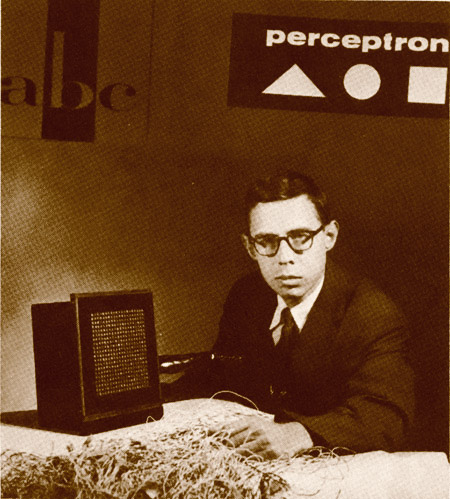
1. 심리학과 교수면서 신경생물학에도 관심이 깊었던 로젠블랏이 실제로 공학 역사에 남을 기념비적인 발명을 합니다. 
2. M-P 뉴런에 기반하여 trial and error 방식에 의해 인간의 사고방식을 모사하는 기계를 만들려는 노력이 당시 개발되기 시작한 전기 부품을 활용해서 만든 Perceptron입니다. 
3. 지금과 같이 general program 이 가능한 컴퓨터가 없던 당시에 진공관을 배선해서 학습이 가능한 기계를 만든 창의력과 집념은 대단하지요?
4. 사실 perceptron 이라는 이름은 약간 misleading 합니다. 숫자나 글자와 같은 패턴을 읽을 수 있다고 해서 perceptron 이라고 이름을 붙였지만 사실 이 기계가 하는 일은 지각이 아닌 학습이니까요
5. 어쨌든 인류 최초로 스스로 학습이 가능한 기계가 탄생한 겁니다. 인간이 배울 수 있는 거라면 뭐든지 배울수 있다는 꿈에 부풀었죠
6. 위의 M-P neuron 에다가 간단한 학습 rule 을 넣으면 됩니다. 그 학습 rule 은 delta rule 즉 error 에 기반해서 error 를 줄이는 방향으로 weight 을 변경시켜 나가는 거죠. 
7. 그럼 위의 프로그램에 몇가지 추가해서 perceptron 을 만들어 봅시다
8, 가장 중요한 것은 error 를 계산하는 거겠죠? error 를 계산하기 위해서는 target 이 있어야 합니다. error=target-predicted 이니까요
9. 그다음 만약에 error 가 생기면 그걸 가지고 얼마만큼 weight 을 수정할 것인가를 결정하는 것입니다. 이걸 학습 상수라고 합니다. 크면 클수록 좋다고 생각하겠지만 너무 크면 실제로 정답을 못 맞추고 헤맬 수 있읍니다.  정답 맞추는 걸 수렴한다 혹은 global minimum 을 찾는다고 합니다. 여기서의 minimum 은 무엇을 의미하죠? GM 을 못찾고 local minimum 에 stuck 되는 것이 나중에 복잡한 문제를 푸는 ANN 에서 흔하게 경험하게 되는 문제입니다. 
10. 마지막으로 중요한 것은 input vector 입니다. 만약에 input 이 0이었다면 실제로 output 에 기여한 바가 전혀 없으므로 weight update 를 하는게 말이 안되겠죠? 즉 weight update는 학습 상수 뿐 아니라 입력의 크기에 비례해야 합니다. 
11. 아래의 프로그램을 보면 이런 간단한 조작으로 error 가 줄어드는 것을 볼 수 있읍니다. 
12. 여기서  explicit 하게 보이지는 않지만 중요한 가정이 있죠. delta rule 을 쓰면 반드시 정답을 찾게 된다는 겁니다. 이걸 증명하는 것은 다음번 multilayer perceptron 으로 미루고 일단 아래 코드를 사용해서 여러가지 문제를 풀어보고 (모든 가능한 출력의 조합은 몇 개나 될까요?) 코드도 변형시켜 보세요. 
13. 특히 중요한 것은 학습이 진행되는 상황을 모니터해보는 겁니다. 어떻게 하면 될까요?

In [5]:
import numpy as np

def step_func (threshold, x):
    if x<threshold:
        return 0
    return 1

input_v=np.array([[0,0],[0,1],[1,0],[1,1]])
weight_v=np.random.randn(2) 
target=np.array([0,0,0,1])
threshold=0.9
alpha=0.1                                     #learning rate
iteration=20

print(weight_v)

for j in range(iteration):
    for i in range(len(input_v)):
      error=target[i]-step_func(threshold, np.dot(input_v[i],weight_v))
      weight_v+=alpha*error*input_v[i]
      print(error)
    print(weight_v)

[1.07667321 0.59854434]
0
0
-1
0
[0.97667321 0.59854434]
0
0
-1
0
[0.87667321 0.59854434]
0
0
0
0
[0.87667321 0.59854434]
0
0
0
0
[0.87667321 0.59854434]
0
0
0
0
[0.87667321 0.59854434]
0
0
0
0
[0.87667321 0.59854434]
0
0
0
0
[0.87667321 0.59854434]
0
0
0
0
[0.87667321 0.59854434]
0
0
0
0
[0.87667321 0.59854434]
0
0
0
0
[0.87667321 0.59854434]
0
0
0
0
[0.87667321 0.59854434]
0
0
0
0
[0.87667321 0.59854434]
0
0
0
0
[0.87667321 0.59854434]
0
0
0
0
[0.87667321 0.59854434]
0
0
0
0
[0.87667321 0.59854434]
0
0
0
0
[0.87667321 0.59854434]
0
0
0
0
[0.87667321 0.59854434]
0
0
0
0
[0.87667321 0.59854434]
0
0
0
0
[0.87667321 0.59854434]
0
0
0
0
[0.87667321 0.59854434]


#plotting hit/error rate

[0.05871174 0.64229943]
[0.15871174 0.74229943]


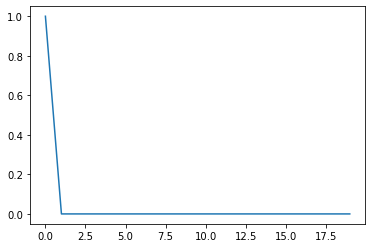

In [6]:
import numpy as np
import matplotlib.pyplot as plt

input_v=np.array([[0,0],[0,1],[1,0],[1,1]])
weight_v=np.random.randn(2) 
target=np.array([0,0,0,1])
threshold=0.9
alpha=0.1                                     #learning rate
iteration=20
error_array=np.zeros(iteration)

print(weight_v)

for j in range(iteration):
    for i in range(len(input_v)):
      error=target[i]-step_func(threshold, np.dot(input_v[i],weight_v))
      weight_v+=alpha*error*input_v[i]
      if error!=0:
        error_array[j]+=1

print(weight_v)

plt.plot(error_array)
plt.show()

조금 더 복잡한 패턴을 학습시켜 봅시다. 
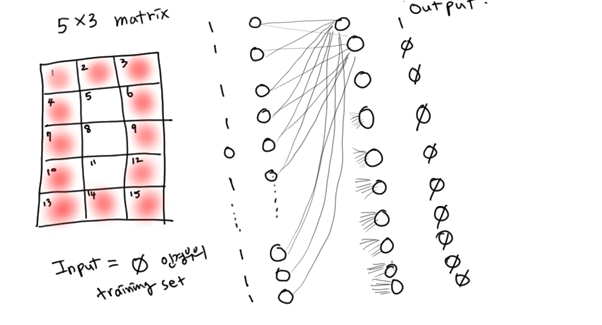
앞서의 logic operation 문제도 사실 픽셀 두개짜리 간단한 이미지라고 생각할 수 있겠죠? 약간 더 복잡하게 픽셀이 15개짜리 이미지라고 생각해봅시다. 파리나 모기의 눈 정도 되겠죠? 그런데 이렇게 15개의 픽셀만 해도 가능한 모든 경우의 이미지를 전부 generate 하는 것은 거의 불가능합니다. 몇개죠?
 
 그래서 현실적으로 몇 가지 의미 있는 패턴만 가르치려고 합니다. 우선 숫자를 읽게 하고 싶어요. 


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#step function for matrix
def Step_func (threshold, X):
   return np.where(X<threshold, 0, 1)

threshold=0.9
alpha=0.1                                     #learning rate
iteration=50
error_array=np.zeros(iteration)
n_of_input=15
n_of_output=10

input_v=np.array([[1,1,1,1,0,1,1,0,1,1,0,1,1,1,1],
                 [0,1,0,1,1,0,0,1,0,0,1,0,1,1,1],
                 [1,1,1,0,0,1,1,1,1,1,0,0,1,1,1],
                 [1,1,1,0,0,1,1,1,1,0,0,1,1,1,1],
                 [1,0,1,1,0,1,1,1,1,0,0,1,0,0,1],
                 [1,1,1,1,0,0,1,1,1,0,0,1,1,1,1],
                 [1,1,1,1,0,0,1,1,1,1,0,1,1,1,1],
                 [1,1,1,0,0,1,0,0,1,0,0,1,0,0,1],
                 [1,1,1,1,0,1,1,1,1,1,0,1,1,1,1],
                 [1,1,1,1,0,1,1,1,1,0,0,1,1,1,1]])
weight_v=np.random.randn(n_of_input,n_of_output) 
target=np.array([[1,0,0,0,0,0,0,0,0,0],
                 [0,1,0,0,0,0,0,0,0,0],
                 [0,0,1,0,0,0,0,0,0,0],
                 [0,0,0,1,0,0,0,0,0,0],
                 [0,0,0,0,1,0,0,0,0,0],
                 [0,0,0,0,0,1,0,0,0,0],
                 [0,0,0,0,0,0,1,0,0,0],
                 [0,0,0,0,0,0,0,1,0,0],
                 [0,0,0,0,0,0,0,0,1,0],
                 [0,0,0,0,0,0,0,0,0,1]])

for j in range(iteration):
    for i in range(len(input_v)):
      error=target[i]-Step_func(threshold, np.dot(input_v[i],weight_v))
      for k in range(n_of_input):                                       
         weight_v[k]+=alpha*error*input_v[i][k]                 #Output 이 matrix가 아닌 1-dim array라서 이렇게 loop를 한번 더 넣어줘야 한다.
                                                                #이방법이 너무 원시적이면 dot product로 한방에 할 수도 있음 (한번 시도해 보길)                                               
    error_array[j]+=np.count_nonzero(error==0)
      
                                      
plt.plot(error_array)                        

# 자 한번 테스트해 봅시다
#학습한 세트에서 조금만 벗어나도 엉뚱한 답을 내놓는 것을 알 수 있을 겁니다. 

In [ ]:
#우선 이미 정답을 알고 있는 패턴을 넣어볼까요? 아래는 "0"입니다. 
newinput=[1,1,1,1,0,1,1,0,1,1,0,1,1,1,1] 
print( Step_func(threshold, np.dot(newinput,weight_v)))

#한쪽 구석의 픽셀을 바꾸어보면?
newinput=[1,1,1,1,0,1,1,0,1,1,0,1,1,1,0] 
print( Step_func(threshold, np.dot(newinput,weight_v)))

#정말로 애매한 패턴을 넣어봅니다. 이건 3과 5의 중간쯤 됩니다. 
newinput=[1,1,1,0,1,0,1,1,1,0,0,1,1,1,1] 
print( Step_func(threshold, np.dot(newinput,weight_v)))

#"7"을 다르게 써보면? 
newinput=[1,1,1,0,0,1,0,1,0,0,1,0,1,0,0] 
print( Step_func(threshold, np.dot(newinput,weight_v)))